In [9]:
import pandas as pd
import sweetviz as sv
import dtale as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plb
import matplotlib.gridspec as gridspec

C:\Users\DONKAMS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
#loading the data
df = pd.read_csv('C:/Users/DONKAMS/Downloads/Project_STA2017/NigeriaAutoInsurance_Vehicle_cleaned.csv')
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Lagos,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Municipal Area Council,Federal Capital Territory,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Apapa,Lagos,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Lagos,Car Classic,0


#### Data Profiling ####

In [10]:
#use sweetviz to generate a report and save it as html file
report = sv.analyze(df)
report.show_html('NigeriaAutoInsurance_Vehicle_report.html')

Feature: ID                                  |▋         | [  7%]   00:00 -> (00:00 left)C:\Users\DONKAMS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

Feature: Policy Start Date                   |█▎        | [ 13%]   00:00 -> (00:01 left)C:\Users\DONKAMS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

Feature: Policy End Date                     |██        | [ 20%]   00:00 -> (00:01 left)C:\Users\DONKAMS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

Report NigeriaAutoInsurance_Vehicle_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
#use dtale to generate a report and save it as html file
d = dt.show(df)
d.open_browser()

#### Univariate Analysis ####

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      2667 non-null   object
 1   Policy Start Date       2667 non-null   object
 2   Policy End Date         2667 non-null   object
 3   Gender                  2667 non-null   object
 4   Age                     2667 non-null   int64 
 5   First Transaction Date  2667 non-null   object
 6   No_Pol                  2667 non-null   int64 
 7   Car_Category            2667 non-null   object
 8   Subject_Car_Colour      2667 non-null   object
 9   Subject_Car_Make        2667 non-null   object
 10  LGA_Name                2667 non-null   object
 11  State                   2667 non-null   object
 12  ProductName             2667 non-null   object
 13  target                  2667 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 291.8+ KB


In [16]:
#classify the data into categorical and numerical and save them in different variables as a list
categ_cols = list[df.select_dtypes(include=['object']).columns]
num_cols = list[df.select_dtypes(include=['int64','float64']).columns]

In [17]:
categ_cols

list[Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender',
       'First Transaction Date', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName'],
      dtype='object')]

In [18]:
num_cols

list[Index(['Age', 'No_Pol', 'target'], dtype='object')]

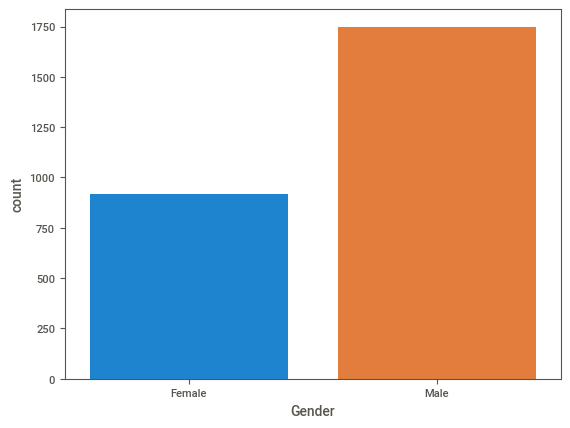

In [24]:
#use seaborn to plot the distribution of the Gender Column
sns.countplot(x='Gender', hue='Gender', data=df)
plt.show()


#### The analysis of the gender distribution reveals a slightly higher number of females (53%) compared to males (47%). Despite the relatively small difference, it holds statistical significance. The data further indicates a gender ratio of 0.86, signifying 86 males for every 100 females. Furthermore, the 95% confidence interval for the difference in the proportion of genders falls between 2% and 12%.

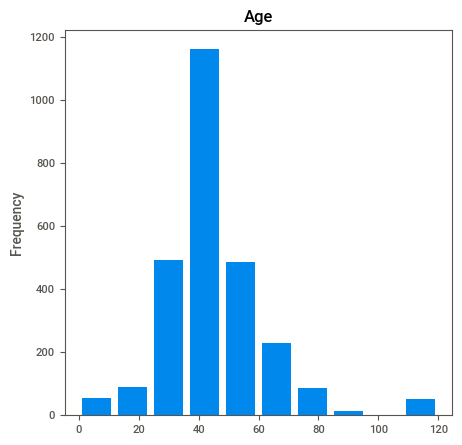

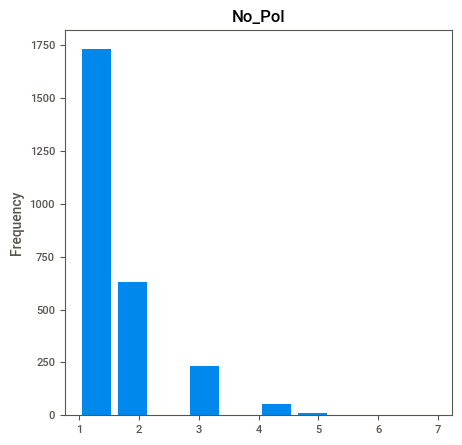

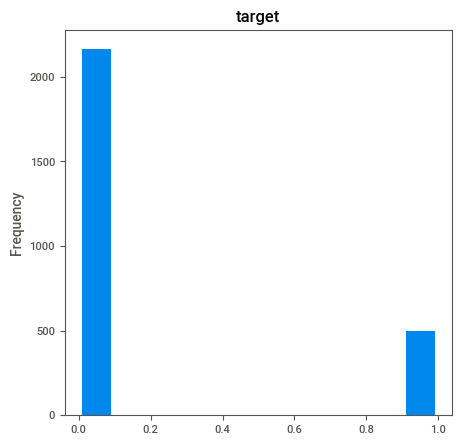

In [25]:
# For numeric columns
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(5, 5))
    df[column].plot(kind='hist', rwidth=0.8)
    plt.title(column)
    plt.show()

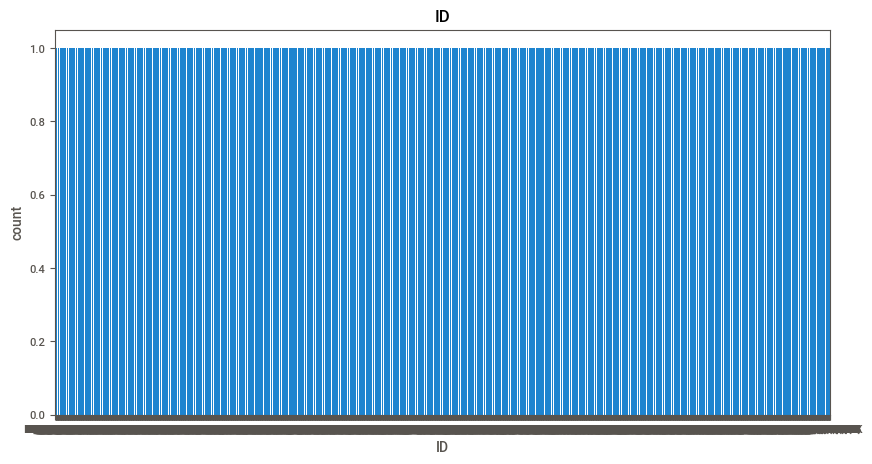

2023-12-01 08:35:10,803 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-01 08:35:10,880 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


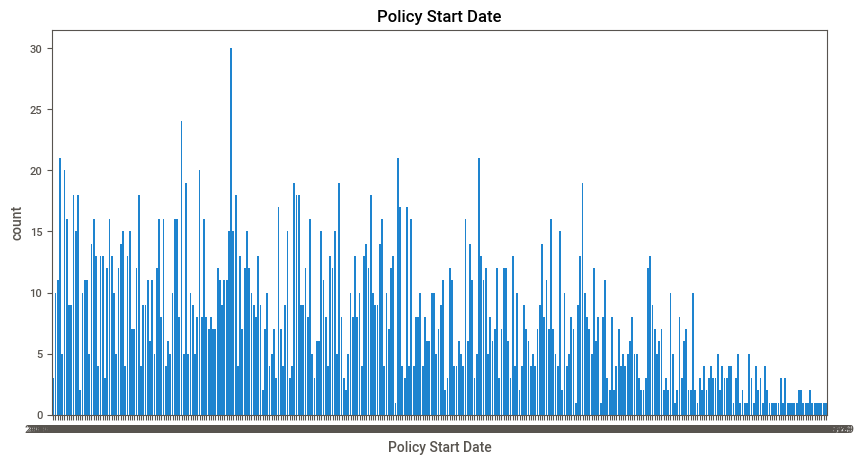

2023-12-01 08:35:15,572 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-01 08:35:15,646 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


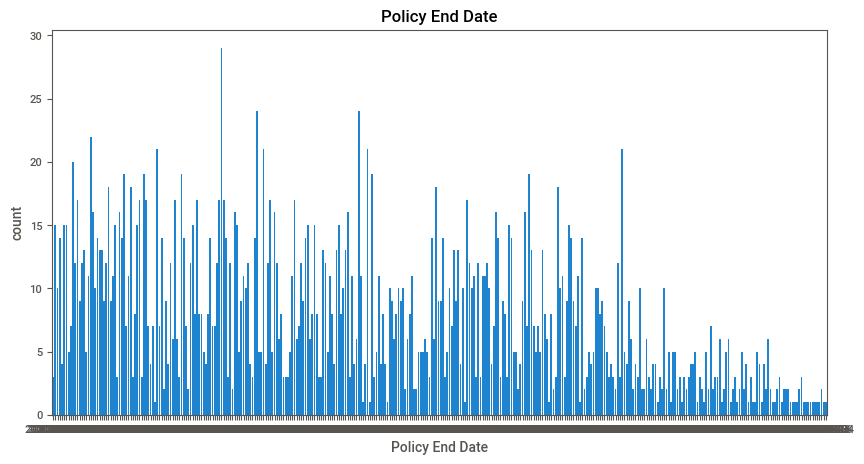

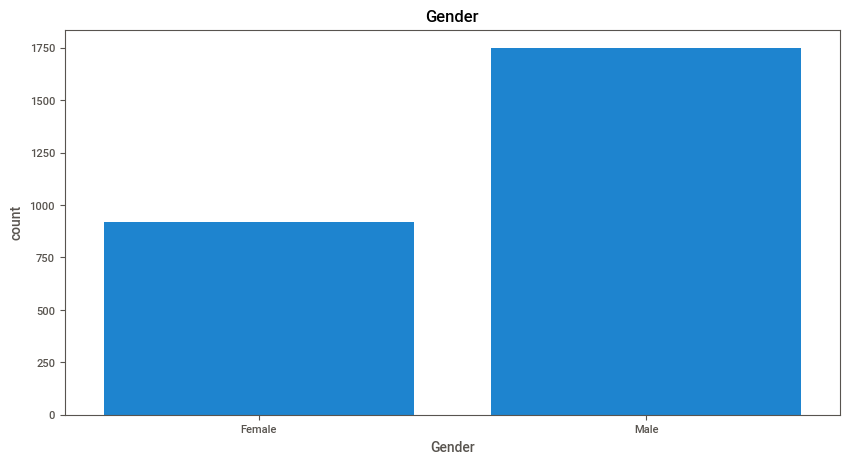

2023-12-01 08:35:19,890 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-01 08:35:19,935 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


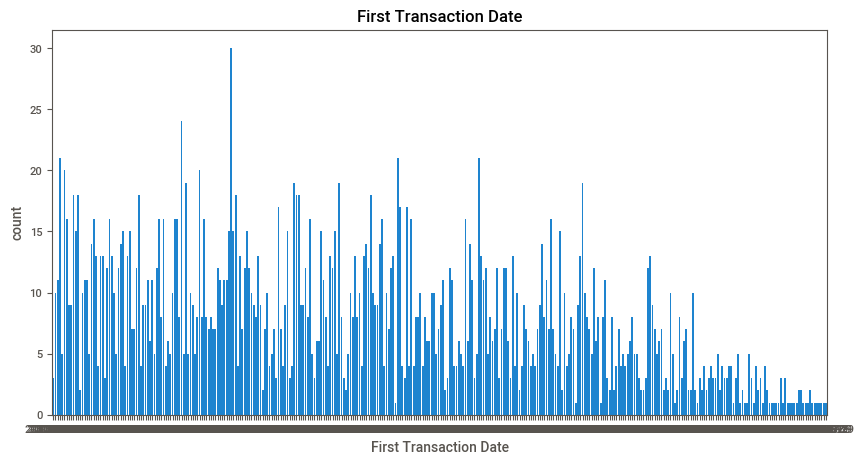

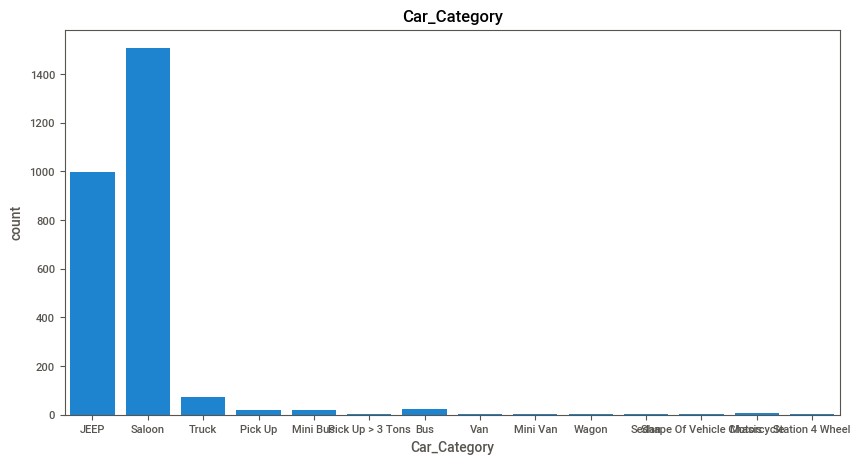

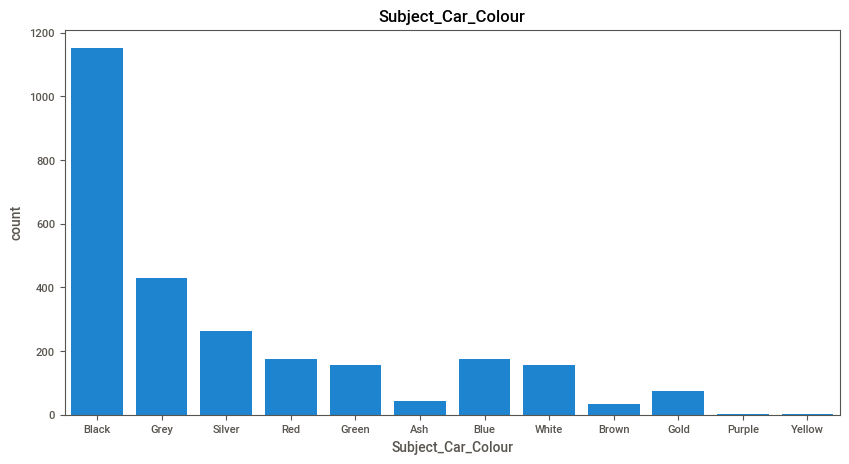

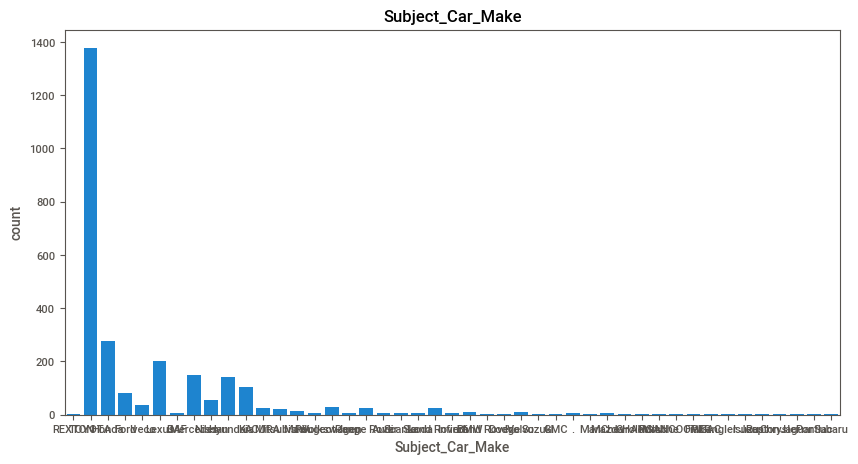

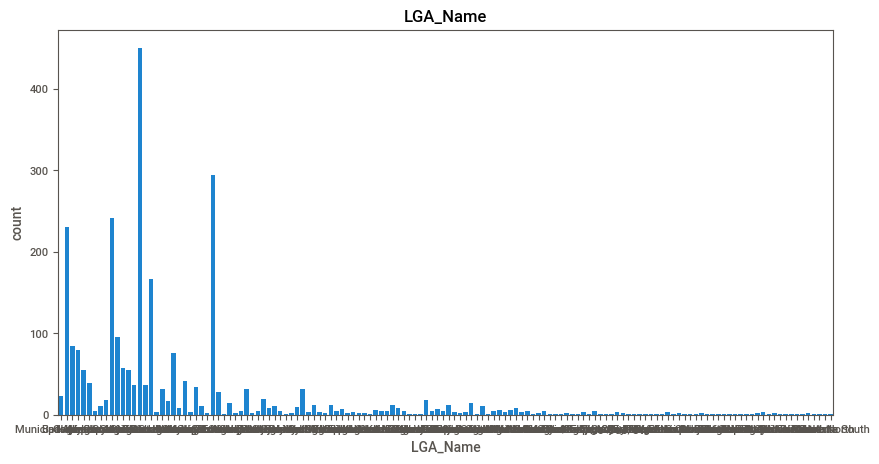

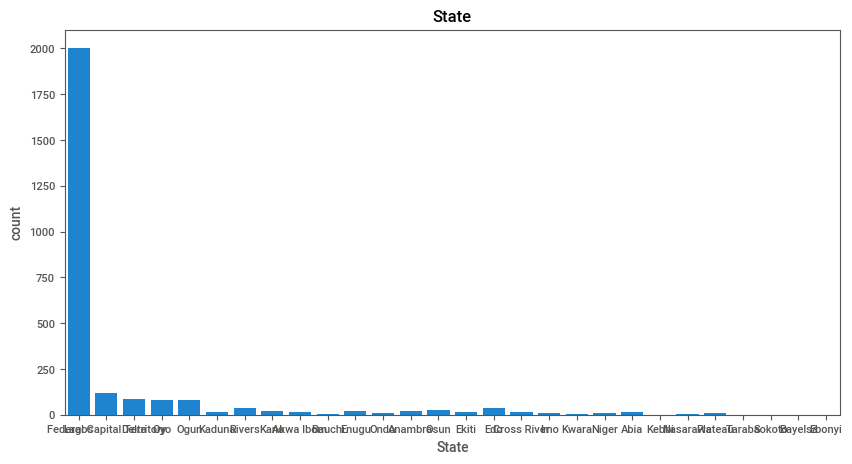

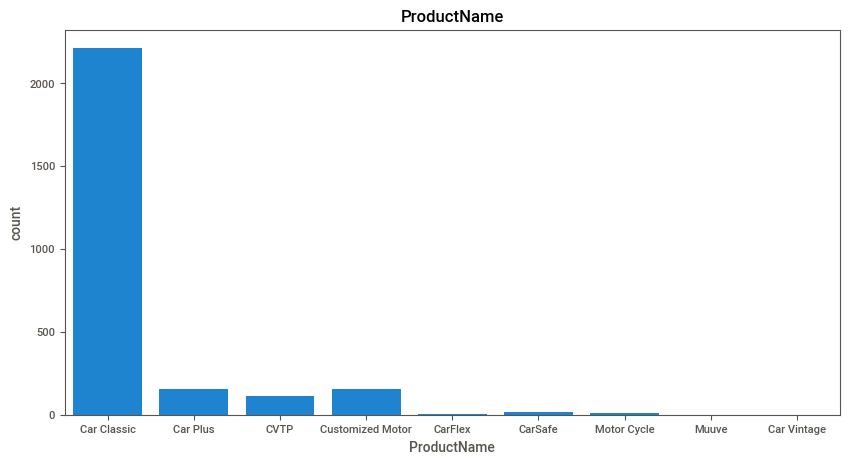

In [27]:
# For categorical columns
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(column)
    plt.show()

<h2 align='center'> Car Catergory Distribution </h2>

The bar graph for the Car displays Nigeria's car distribution, with Saloon, Truck, and Pick as the top choices, comprising over 70% of cars. Conversely, Mini, Valastraßeren, and Vellotated Wheel are the least favored.

Possible reasons include preferences for larger cars due to family size, goods transport needs, terrain considerations, or pricing disparities. Higher costs of Saloons, Trucks, and Picks compared to Minis and Valastraßeren hint at a potentially higher disposable income among Nigerians.

The Nigerian automobile market is evolving, impacting demand for various car types. Uncertainty remains around "Valastraßeren" and "Vellotated Wheel," possibly misspellings or specific Nigerian car types. Units in the graph aren't specified but likely indicate car quantities in each category.

In summary, the graph provides insights into Nigeria's automobile market, emphasizing the prevalence of larger car types potentially influenced by socio-economic factors.

<h2 align = 'center'> ProductName Distribution </h2>

The data illustrates the distribution of product names among various car types. The most prevalent types are "car classic," followed by "car plus," "car voltage," and "customized motor." Less common types include "car vintage" and "muuve."

This variety suggests diverse car types available to meet distinct preferences. "Car classic" and "car plus" are popular, indicating demand for traditional and modern cars. The rise of electric vehicles is evident in the popularity of "car voltage."

While specifics about features are lacking, product names hint at differences. For instance, "car plus" suggests added features, while "car voltage" implies an electric vehicle.

Overall, this data aids manufacturers and buyers in understanding preferences. It highlights a segmentation catering to diverse consumer needs, emphasizing traditional and modern cars, and the emergence of electric vehicles.


<h2 align='center'> State Distribution </h2>
The viz depicts the state distribution within the automobile industry. Leading states include Lagos, Ogun, Oyo, Delta, and Edo, while less prominent are Yobe, Taraba, Ebonyi, Gombe, and Adamawa.

This concentration suggests key hubs in Lagos, Ogun, and Oyo, known for industry and commerce. Additionally, Delta and Edo benefit from their oil and gas resources, bolstering their significance in the automobile sector.

Several factors contribute to this concentration: robust infrastructure like roads and ports facilitating transportation, and a skilled labor force vital to the industry.

For consumers, this concentration means broader access to cars and services in leading states. However, those in other regions might face higher costs or travel farther for car-related needs.

Overall, this state distribution underscores the industry's focus in specific states, impacting both industry dynamics and consumer accessibility.

<h2 align = 'center'> LGA Distribution </h2>
The image displays the Local Government Area (LGA) distribution in the automobile dataset. Predominant LGAs include Alimosho, Surulere, Ikeja, Oshodi-Isolo, and Eti-Osa, while less prevalent are Gwagwalada, Kuje, Abaji, Bwari, and Kwali.

This concentration highlights key LGAs in Lagos State, renowned as commercial and industrial centers with numerous automobile manufacturers and dealerships.

Several factors contribute to this concentration, such as superior infrastructure facilitating car and part transportation, and a substantial skilled workforce crucial to the automobile industry.

For consumers, concentration in specific LGAs means broader access to cars and services. Yet, those in other LGAs might encounter higher costs or need to travel farther for car-related needs.

In summary, the LGA distribution emphasizes the industry's concentration in key areas within Lagos State, influencing both industry dynamics and consumer accessibility.


<h2 align='center'> Subject Car Make Distribution </h2>
The Subject_Car_Make distribution in Nigeria favors Toyota, Honda, Nissan, Hyundai, and Kia, while Land Rover, Audi, Mercedes-Benz, BMW, and Ford have less presence.

Japanese car makes dominate due to reliability and affordability, with Korean brands also gaining ground for value-for-money options. This mirrors Nigerian consumers' brand loyalty.

Takeaways:

Japanese and Korean brands lead, German brands follow with a significant share, and American brands lag.
Nigerian consumers exhibit strong brand loyalty.
Manufacturers should focus on maintaining reliability (Japanese), value (Korean), luxury (German), and invest in marketing for American brands.
Consumers can consider Japanese for reliability, Korean for value, and German for luxury when making car purchase decisions.

<h2 align='center'> Subject Car Colour Distribution </h2>
The Subject_Car_Colour distribution in Nigeria highlights Black as the most common, followed by White, Grey, Silver, and Blue. Conversely, Gold, Brown, Green, Yellow, and Purple are less favored.

This trend signifies a preference for neutral car colors like Black, White, Grey, and Silver, possibly due to their perceived sophistication, easy maintenance, or higher resale value.

Notably, this color distribution aligns with global trends favoring neutral hues in car colors.

Additional insights:
- Black leads, followed by White, Grey, Silver, and Blue.
- Neutrals surpass bright or bold colors.
- Similar car color distribution exists in other countries.
- Manufacturers can cater to Nigerian preferences by offering a broader array of neutral car colors.

Consumers seeking easy maintenance or better resale value might find neutral colors like Black, White, Grey, or Silver more suitable when choosing a car color.

<h2 align='center'> Gender Distribution </h2>
The gender distribution in the Nigerian automobile dataset predominantly favors males over females. This suggests a higher likelihood of car ownership among men, influenced by cultural norms, economic differences, or work-related travel needs.

This distribution closely mirrors the gender demographics of the overall Nigerian population, where males account for 51.4%, as per the World Bank.

Key points:

- Male car ownership surpasses female ownership in Nigeria.
- Resemblance between gender distribution in the automobile dataset and the Nigerian population.
- Manufacturers can tailor marketing campaigns based on gender preferences.
- Female consumers considering car purchase may note their potential minority status among car owners.
- Understanding the prevailing trend of male-dominated car ownership in Nigeria can aid both manufacturers and consumers in making informed decisions.